Introuducción del proyecto:
Las consolas de los juegos marcaron una pauta importante para el desarrollo en video juegos
Se analizará y se observará qué marcas fueron las revolucionarias y en qué países se obtuvieron más ventas para predecir las ventas de 2017.
objetivos:

Determinar las cinco plataformas principales
Determinar los cinco géneros principales
Determinar si  las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [1]:
# Importa pandas para el manejo de los DataFrame
import pandas as pd
# Importa numpy para
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#cargar los datos:
data_games = pd.read_csv("/datasets/games.csv")

In [3]:
#visualizacion de los datos
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#visualización del DF en tabla
data_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#contar los valores ausentes
print(data_games.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:
#reemplazar los valores ausentes por 0
columns_to_replace = ['Year_of_Release','Critic_Score','User_Score', 'Rating', 'Genre' ]
for col in columns_to_replace:
    data_games[col]= data_games[col].fillna(0)

In [7]:
print(data_games.isna().sum())

Name               2
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64


In [8]:
#corroborando que no haya valores duplicados
print(data_games.duplicated().sum())

0


In [9]:
#pasar los nombres de las columnas en minusculas

new_col_lower=[]

for old_col in data_games.columns:
    col_lowered=old_col.lower()
    new_col_lower.append(col_lowered)
    
data_games.columns=new_col_lower
print(data_games.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [10]:
#corroborar Data Frame
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,0


In [11]:
#convertir todos los tipos de datos, se convertirán todos los datos en int para eliminar los decimales en la columna year_of_release

data_games["year_of_release"]= data_games["year_of_release"].astype("int")
#convertir todos los datos float en la columna na_sales
data_games["na_sales"]= data_games["na_sales"].astype("int")
#convertir todos los datos a float de la columna eu_sales
data_games["eu_sales"]= data_games["eu_sales"].astype("int")
#convertir todos los datos a float de la columna jp_sales
data_games["jp_sales"]= data_games["jp_sales"].astype("int")
#convertir todos los datos a float de la columna other_sales
data_games["other_sales"]= data_games["other_sales"].astype("int")
#convertir todos los datos a float de la columna critic_score
data_games["critic_score"]= data_games["critic_score"].astype("int")



print(data_games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

se cambiaron los valores ausentes por cero para poder cambiar las columnas en números enteros, posiblemente no haya datos registrados por ejemplo en el año de lanzamiento porque se perdió el registro o por se lanzaron en el mismo año que el dato anterior y como es el mismo año no se agregó para no poner datos duplicados, adicional y hay  datos vacíos en las reseñas de juegos porque no todo los usuarios los criticaron o simplemente porque no se lanzaron como tal en el mercado al igual que no hay reseñas por usuario por las mismas razones.

In [12]:
# calculando las ventas totales de todas las regiones
total_sales = data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum()

print(f'Total sales across all regions: {total_sales}')

Total sales across all regions: 3140


*se rellenaron los valores nulos en score de críticos y usuarios

In [13]:
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41,28,3,8,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29,3,6,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,15,12,3,3,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15,10,3,2,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,8,10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0,0,0,0,0
16711,LMA Manager 2007,X360,2006,Sports,0,0,0,0,0,0,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0,0,0,0,0
16713,Spirits & Spells,GBA,2003,Platform,0,0,0,0,0,0,0


SECCION 3. ANALIZANDO LOS DATOS

In [14]:
#lazamiento de los juegos por año
games_count = data_games['year_of_release'].value_counts().sort_index()
    
print(games_count)

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


platform
3DS     512
DS      184
PC      389
PS2       7
PS3     708
PS4     392
PSP     312
PSV     429
Wii     197
WiiU    147
X360    498
XOne    247
Name: year_of_release, dtype: int64


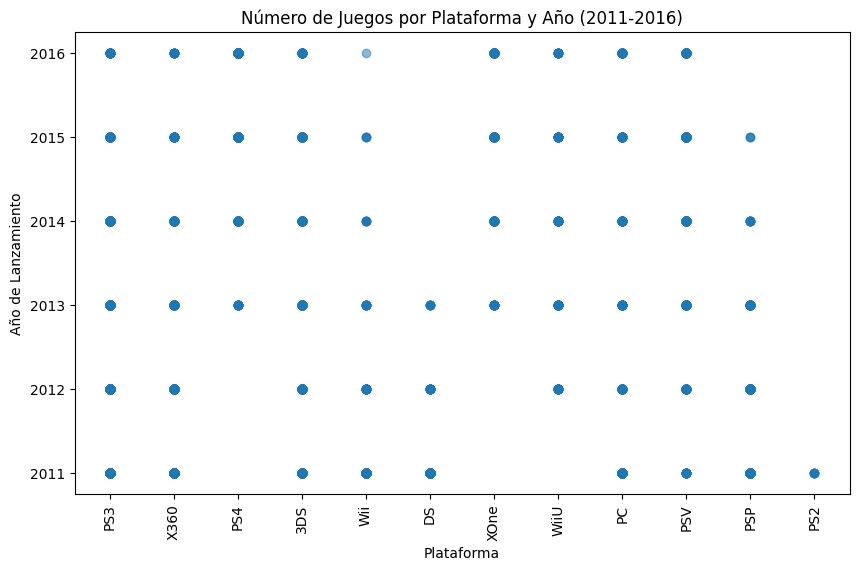

In [15]:
# qué plataforma son las que tienen más ventas, explícalo con una tabla de distribución
import pandas as pd
from matplotlib import pyplot as plt
# Filtrar los datos para el periodo de 2011 a 2016
filtered_data = data_games[(data_games['year_of_release'] >= 2011) & (data_games['year_of_release'] <= 2016)]

# Contar el número de juegos por plataforma en el periodo especificado
games_count_by_platform_year = filtered_data.groupby('platform')['year_of_release'].count()

# Crear una tabla de distribución
print(games_count_by_platform_year)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['platform'], filtered_data['year_of_release'], alpha=0.5)
plt.title('Número de Juegos por Plataforma y Año (2011-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Año de Lanzamiento')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x a 90 grados

# Mostrar el gráfico
plt.show()

De las plataformas que ya no tienen ventas son: GEN sólo se lanzaron 2 en el año de 1994, 2600 sólo estuvo en la temporada del 1981 hasta el año de 1989, 3DO sólo lanzó 3 juegos del 94 al 95, de las plataformas populares se encuentram: DS, año de lanzamiento fue en el 98 y continuó hasta el 2013, PS2 del 98 al 2003, wii desde 2009 al 16 con un total de 1320 juegos.



In [16]:
#El periodo en el que tardan y aparecen nuevas plataformas son al rededor 
# Filtrar los registros donde 'year_of_release' no es 0
data_games_filtered = data_games[data_games['year_of_release'] > 0]

# Encontrar el primer y último año de lanzamiento para cada plataforma
platform_activity = data_games_filtered.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_activity.columns = ['platform', 'first_year', 'last_year']

# Calcular la duración de cada plataforma (tiempo de vida)
platform_activity['duration'] = platform_activity['last_year'] - platform_activity['first_year'] + 1

# Calcular el tiempo promedio de vida de las plataformas
average_lifetime = platform_activity['duration'].mean()

# Mostrar los resultados
print(f"Tiempo de vida de cada plataforma:\n{platform_activity}")
print(f"Tiempo promedio de vida de las plataformas: {average_lifetime:.2f} años")

Tiempo de vida de cada plataforma:
   platform  first_year  last_year  duration
0      2600        1980       1989        10
1       3DO        1994       1995         2
2       3DS        2011       2016         6
3        DC        1998       2008        11
4        DS        1985       2013        29
5        GB        1988       2001        14
6       GBA        2000       2007         8
7        GC        2001       2007         7
8       GEN        1990       1994         5
9        GG        1992       1992         1
10      N64        1996       2002         7
11      NES        1983       1994        12
12       NG        1993       1996         4
13       PC        1985       2016        32
14     PCFX        1996       1996         1
15       PS        1994       2003        10
16      PS2        2000       2011        12
17      PS3        2006       2016        11
18      PS4        2013       2016         4
19      PSP        2004       2015        12
20      PSV        2

El tiempo promedio de vida de las plataformas es de 8 años, mientras que las antiguas plataformas su tiempo de duración oscilaba entre el año a 14 años 

In [17]:
#creación de modelo para estimar 2017

# Filtrar los datos para el periodo de 2011 a 2016
filtered_data = data_games[(data_games['year_of_release'] >= 2011) & (data_games['year_of_release'] <= 2016)]

# Calcular el número de juegos por plataforma y año
games_count_by_platform_year = filtered_data.groupby(['platform', 'year_of_release']).size().unstack(fill_value=0)

# Calcular el promedio de juegos por plataforma durante el periodo 2011-2016
average_sales_per_platform = games_count_by_platform_year.mean()

# Imprimir el promedio de juegos por plataforma
print("Promedio de ventas por plataforma (2011-2016):")
print(average_sales_per_platform)

# Hacer una estimación simple para 2017
# Vamos a usar el promedio de ventas de los años 2011-2016 como estimación para 2017
estimated_sales_2017 = average_sales_per_platform
print(f"\nEstimación de ventas por plataforma para 2017:")
print(estimated_sales_2017)

Promedio de ventas por plataforma (2011-2016):
year_of_release
2011    94.666667
2012    54.416667
2013    45.333333
2014    48.416667
2015    50.500000
2016    41.833333
dtype: float64

Estimación de ventas por plataforma para 2017:
year_of_release
2011    94.666667
2012    54.416667
2013    45.333333
2014    48.416667
2015    50.500000
2016    41.833333
dtype: float64


Las plataformas líderes  son:
XOne
X360
PS4
PSP
van en aumento y todavía siguen vigentes en 2016

<Figure size 1000x600 with 0 Axes>

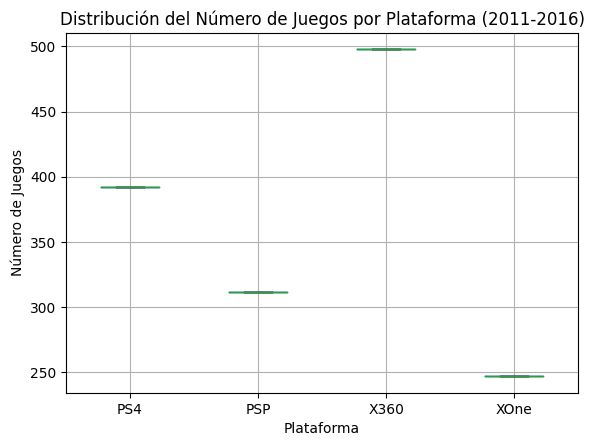

In [18]:
#ventas totales por plataforma con diagrama de caja
# Filtrar los datos para el periodo de 2011 a 2016
filtered_data = data_games[(data_games['year_of_release'] >= 2011) & (data_games['year_of_release'] <= 2016)]

# Filtrar las plataformas de interés
platforms_of_interest = ['X360', 'XOne', 'PS4', 'PSP']
filtered_data = filtered_data[filtered_data['platform'].isin(platforms_of_interest)]

# Contar el número de juegos por plataforma y año
filtered_data['game_count'] = filtered_data.groupby('platform')['year_of_release'].transform('count')

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='game_count', by='platform')

# Añadir título y etiquetas
plt.title('Distribución del Número de Juegos por Plataforma (2011-2016)')
plt.suptitle('')  # Eliminar el título predeterminado 'boxplot'
plt.xlabel('Plataforma')
plt.ylabel('Número de Juegos')

# Mostrar la gráfica
plt.show()

In [19]:
# calcular la correlación con las críticas y reseñas de un juego
platforms_of_interest = ['X360', 'XOne', 'PS4', 'PSP']
filtered_data = data_games[data_games['platform'].isin(platforms_of_interest)]
print(filtered_data)

                                                    name platform  \
14                                    Kinect Adventures!     X360   
23                                    Grand Theft Auto V     X360   
29                        Call of Duty: Modern Warfare 3     X360   
31                             Call of Duty: Black Ops 3      PS4   
32                               Call of Duty: Black Ops     X360   
...                                                  ...      ...   
16679                                        XI Coliseum      PSP   
16682         Grisaia no Kajitsu: La Fruit de la Grisaia      PSP   
16687                              Neo Angelique Special      PSP   
16701  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16711                                   LMA Manager 2007     X360   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
14                2010          Misc        15         4         0   
23                2013        A

In [20]:
#correlación entre reseñas y ventas

# Seleccionar las columnas de ventas y la columna de puntuación crítica
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data_for_corr = data_games[sales_columns]

# Calcular la correlación entre las columnas de ventas y la columna de puntuación crítica
correlation = data_for_corr.corrwith(data_games['critic_score'])
print(f'Correlaciones:\n{correlation}')

Correlaciones:
na_sales       0.082897
eu_sales       0.090970
jp_sales      -0.008933
other_sales    0.055484
dtype: float64


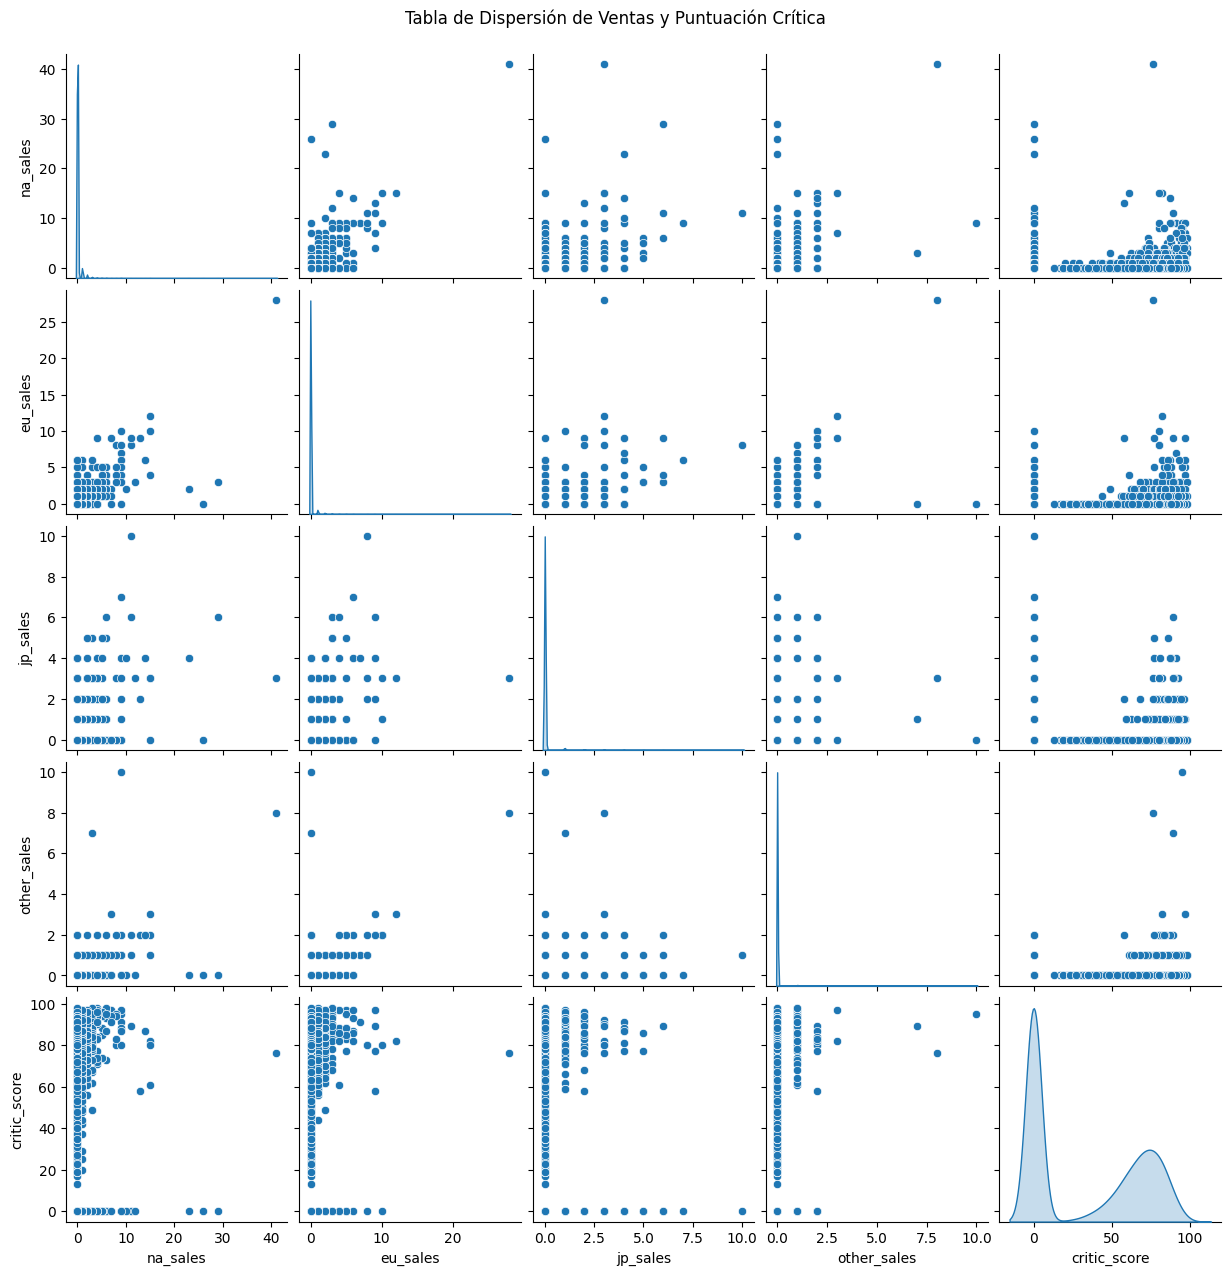

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# se crea matriz de correlación entre los ventas y críticas
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']
data_for_plot = data_games[sales_columns]

# Crear la tabla de dispersión
sns.pairplot(data_for_plot, diag_kind='kde')

# Añadir título
plt.suptitle('Tabla de Dispersión de Ventas y Puntuación Crítica', y=1.02)

# Mostrar la gráfica
plt.show()

se puede observar que los juegos que no tienen críticas ni reseñas no se venden o no son consumidos por los usuarios

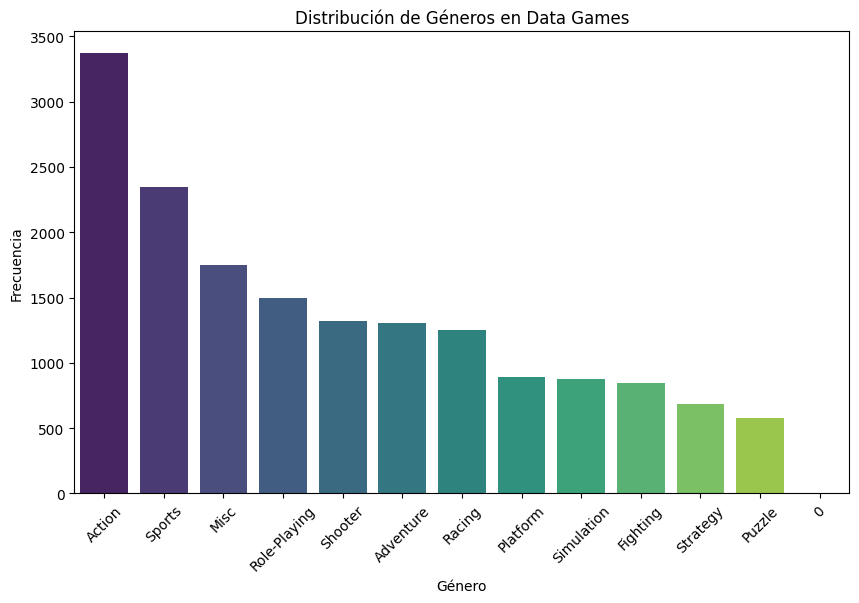

In [22]:
# distribución general por género

# Contar la frecuencia de cada género
genre_counts = data_games['genre'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de Géneros en Data Games')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

los géneros más rentables son acción, deportes, misticos y el de menor es de peleas, estrategia y puzzle, se puede generalizar que son más rentables los juegos de acción y deportes en general

PASO 4. PERFIL DE USUARIO PARA CADA REGION

Top 5 plataformas en NA:
platform
X360    289
Wii     233
PS2     225
PS3     136
PS      132
Name: na_sales, dtype: int64


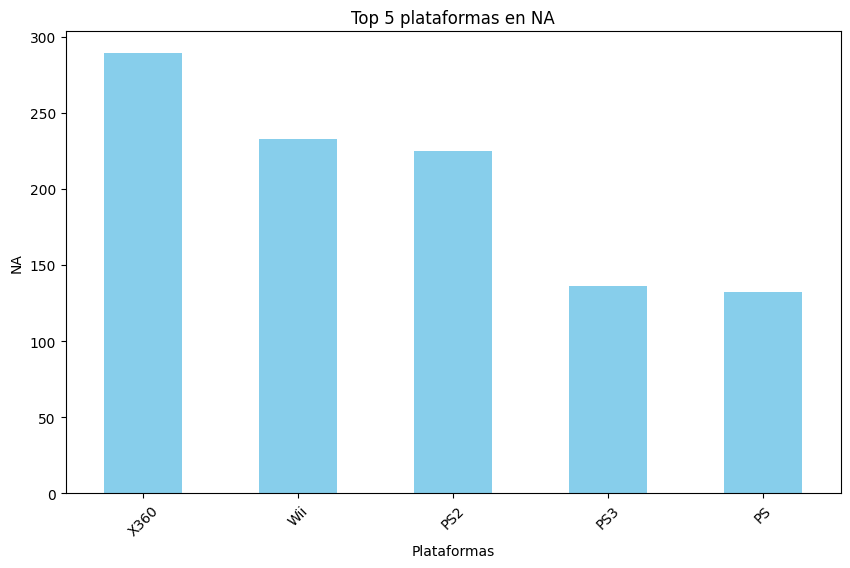

In [23]:
# Encontrar las cinco principales plataformas por región NA
top_platform_na = data_games.groupby('platform')['na_sales'].sum().nlargest(5)

print("Top 5 plataformas en NA:")
print(top_platform_na)

# Crear un gráfico de barras para las primeras plataformas en NA 
plt.figure(figsize=(10, 6))
top_platform_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 plataformas en NA')
plt.xlabel('Plataformas')
plt.ylabel('NA')
plt.xticks(rotation=45)
plt.show()

Top 5 géneros por ventas en NA:
genre
Shooter     306
Action      298
Platform    250
Sports      247
Misc        156
Name: na_sales, dtype: int64


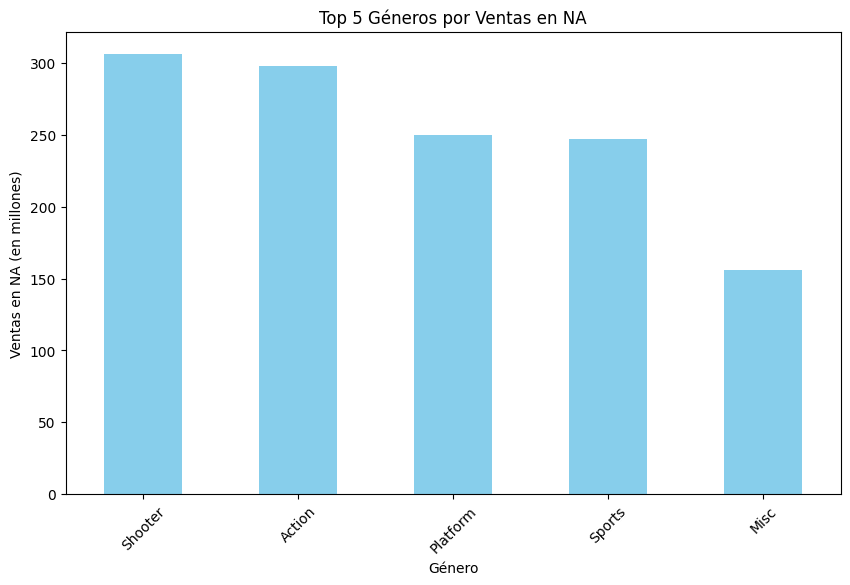

In [24]:

# Encontrar los cinco principales géneros por ventas en NA
top_genre_na = data_games.groupby('genre')['na_sales'].sum().nlargest(5)

print("Top 5 géneros por ventas en NA:")
print(top_genre_na)

# Crear un gráfico de barras para las ventas en NA por género
plt.figure(figsize=(10, 6))
top_genre_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros por Ventas en NA')
plt.xlabel('Género')
plt.ylabel('Ventas en NA (en millones)')
plt.xticks(rotation=45)
plt.show()

Top 5 plataformas en EU:
platform
X360    289
Wii     233
PS2     225
PS3     136
PS      132
Name: na_sales, dtype: int64


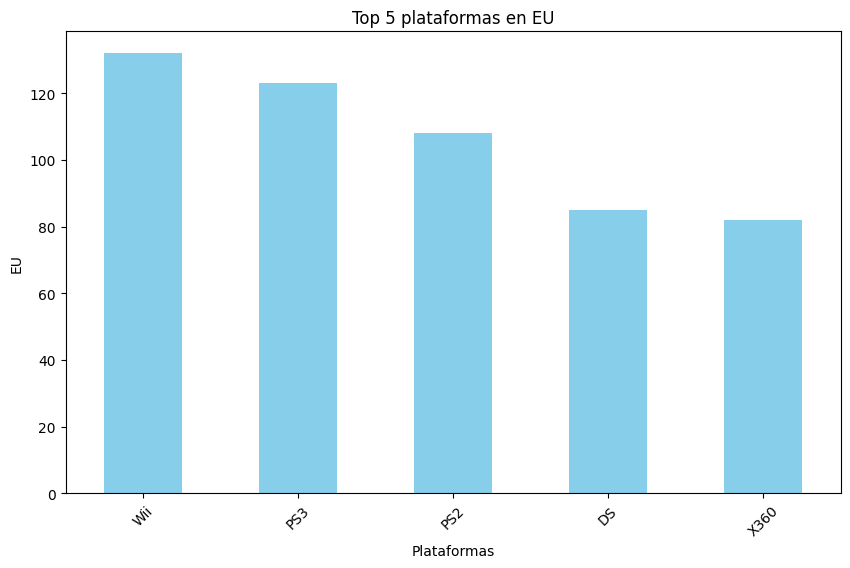

In [25]:
# Encontrar las cinco principales plataformas por región EU
top_platform_eu = data_games.groupby('platform')['eu_sales'].sum().nlargest(5)

print("Top 5 plataformas en EU:")
print(top_platform_na)

# Crear un gráfico de barras para las primeras plataformas en NA 
plt.figure(figsize=(10, 6))
top_platform_eu.plot(kind='bar', color='skyblue')
plt.title('Top 5 plataformas en EU')
plt.xlabel('Plataformas')
plt.ylabel('EU')
plt.xticks(rotation=45)
plt.show()

Top 5 géneros por ventas en EU:
genre
Action          156
Sports          152
Shooter         122
Role-Playing     81
Racing           80
Name: eu_sales, dtype: int64


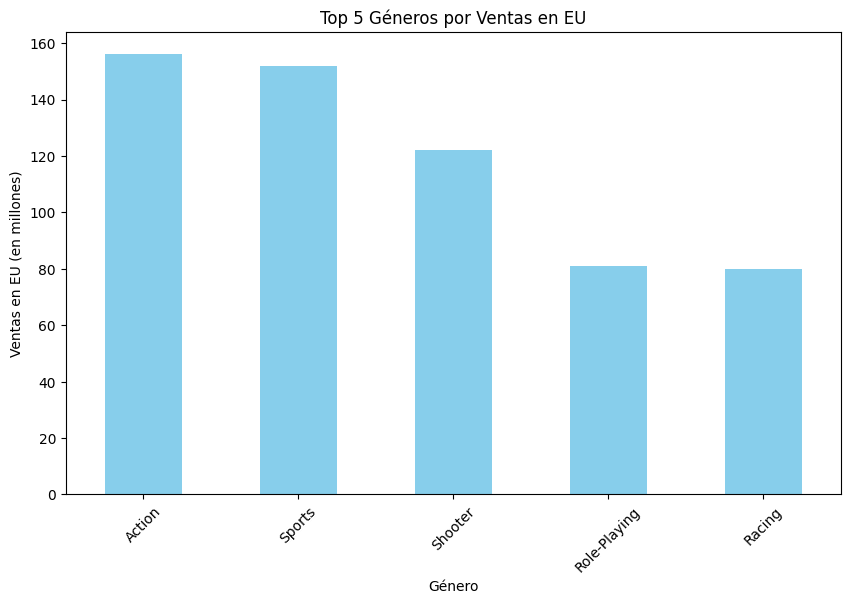

In [26]:

# Encontrar los cinco principales géneros por ventas en EU
top_genre_eu = data_games.groupby('genre')['eu_sales'].sum().nlargest(5)

print("Top 5 géneros por ventas en EU:")
print(top_genre_eu)

# Crear un gráfico de barras para las ventas en NA por género
plt.figure(figsize=(10, 6))
top_genre_eu.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros por Ventas en EU')
plt.xlabel('Género')
plt.ylabel('Ventas en EU (en millones)')
plt.xticks(rotation=45)
plt.show()

Top 5 plataformas en JP:
platform
DS      76
NES     57
GB      51
SNES    45
3DS     43
Name: jp_sales, dtype: int64


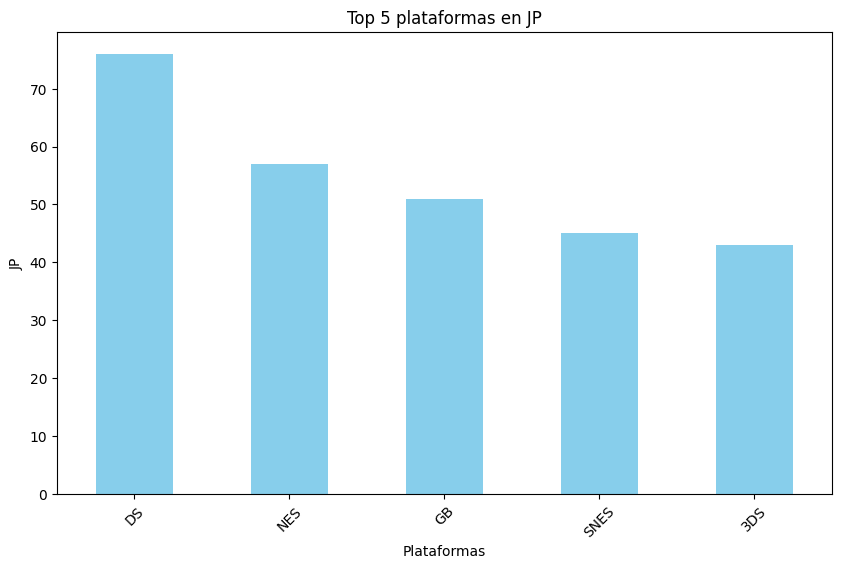

In [27]:
# Encontrar las cinco principales plataformas por región JP
top_platform_jp = data_games.groupby('platform')['jp_sales'].sum().nlargest(5)

print("Top 5 plataformas en JP:")
print(top_platform_jp)

# Crear un gráfico de barras para las primeras plataformas en NA 
plt.figure(figsize=(10, 6))
top_platform_jp.plot(kind='bar', color='skyblue')
plt.title('Top 5 plataformas en JP')
plt.xlabel('Plataformas')
plt.ylabel('JP')
plt.xticks(rotation=45)
plt.show()

Top 5 géneros por ventas en jp:
genre
Role-Playing    160
Platform         64
Sports           35
Misc             32
Action           24
Name: jp_sales, dtype: int64


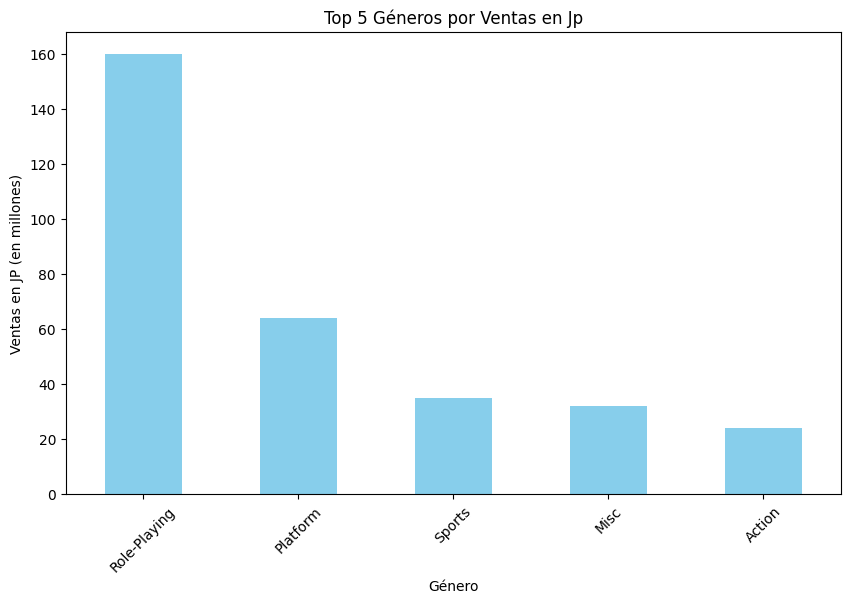

In [28]:

# Encontrar los cinco principales géneros por ventas en JP
top_genre_jp = data_games.groupby('genre')['jp_sales'].sum().nlargest(5)

print("Top 5 géneros por ventas en jp:")
print(top_genre_jp)

# Crear un gráfico de barras para las ventas en NA por género
plt.figure(figsize=(10, 6))
top_genre_jp.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros por Ventas en Jp')
plt.xlabel('Género')
plt.ylabel('Ventas en JP (en millones)')
plt.xticks(rotation=45)
plt.show()

Top 5 géneros por ventas en other_sales:
genre
Action     27
Sports     27
Racing     17
Shooter    17
Misc       10
Name: other_sales, dtype: int64


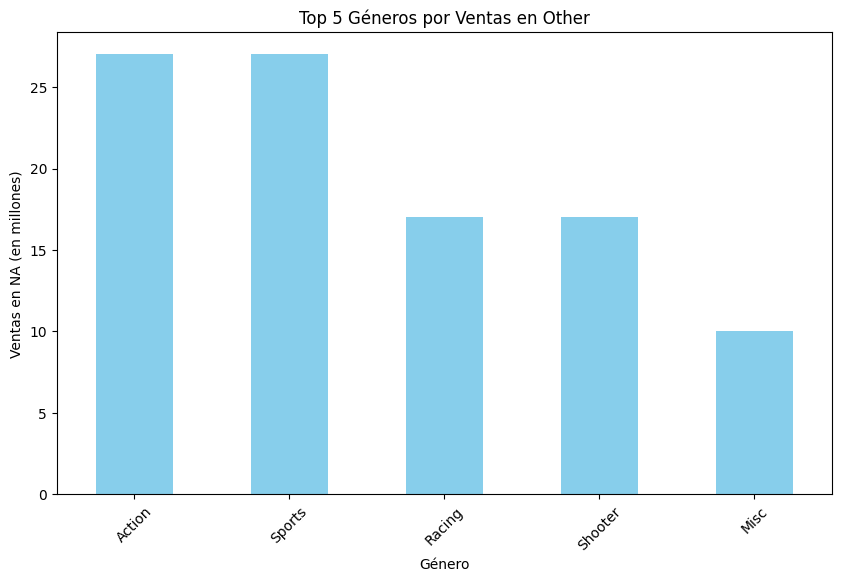

In [29]:

# Encontrar los cinco principales géneros por ventas en others_sales
top_genre_other = data_games.groupby('genre')['other_sales'].sum().nlargest(5)

print("Top 5 géneros por ventas en other_sales:")
print(top_genre_other)

# Crear un gráfico de barras para las ventas en other por género
plt.figure(figsize=(10, 6))
top_genre_other.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros por Ventas en Other')
plt.xlabel('Género')
plt.ylabel('Ventas en NA (en millones)')
plt.xticks(rotation=45)
plt.show()

De forma general se puede observar que el género más predominante es el de acción
Ya dividido por área, se puede encontrar que la plataforma más popular en EUA es x360, en segundo lugar, wii; en temas de ventas se visualiza que el género más popular es Shoter;
para el caso de Europa la plataforma más popular es wii, el segundo lugar es PS3; en el tema de ventas, el género más consumido es acción.
Para Japón para la plataforma que es más popular es DS, el segundo lugar NES, en ventas el género más popular es Role-playing.

In [30]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
ESRB_sales_na = data_games.groupby('rating')['na_sales'].sum().nlargest(5)
ESRB_sales_eu = data_games.groupby('rating')['eu_sales'].sum().nlargest(5)
ESRB_sales_jp = data_games.groupby('rating')['jp_sales'].sum().nlargest(5)

print(ESRB_sales_na)
print(ESRB_sales_eu)
print(ESRB_sales_jp)

rating
0       578
E       505
M       382
T       224
E10+     84
Name: na_sales, dtype: int64
rating
E       304
0       197
M       197
T       107
E10+     36
Name: eu_sales, dtype: int64
rating
0       260
E        92
T        38
E10+     10
M         7
Name: jp_sales, dtype: int64


Se puede observar que por región todos los juegos en clasificación "everyone" son más consumidos, en segundo lugar la clasificación "mature" es el segundo consumido en NA y en EU, sin embargo en Japón se puede observar que la segunda es la clasificación "teen", la menor clasificación consumida en NA y EU es: "everyone 10+"


PRUEBA DE HIPOTESIS

In [32]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
import pandas as pd
from scipy import stats

# Filtrar los datos para las dos plataformas
xbox_one_scores = data_games[data_games['platform'] == 'XOne']['critic_score']
pc_scores = data_games[data_games['platform'] == 'PC']['critic_score']

# Realizar una prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)  # equal_var=False es para Welch's t-test

# Imprimir los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretar el valor p
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las calificaciones promedio de Xbox One y PC.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio de Xbox One y PC son diferentes.")

Estadístico t: -2.1946812680792402
Valor p: 0.028801605405159414
Rechazamos la hipótesis nula: hay una diferencia significativa entre las calificaciones promedio de Xbox One y PC.


In [33]:
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
import pandas as pd
from scipy import stats

# Filtrar los datos para las dos plataformas
critic_score_Action = data_games[data_games['genre'] == 'Action']["critic_score"]
critic_score_Sports = data_games[data_games['genre'] == "Sports"]['critic_score']

# Realizar una prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(critic_score_Action, critic_score_Sports, equal_var=False)  # equal_var=False es para Welch's t-test

# Imprimir los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretar el valor p
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las calificaciones promedio del género acción y deportes")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio del género acción y deportes son diferentes.")

Estadístico t: 0.8013290181979988
Valor p: 0.4229807447766385
No rechazamos la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio del género acción y deportes son diferentes.


Explicación de como se formulo la hipotesis nula y la alternativa, se hizo una hipótesis sobre igualdad de media de poblaciones, ya que se hicieron comparaciones sobre dos columnas, en el primer caso, se hizo la comparación sobre la columna, platform y critic_score, para xone y pc, en el segundo caso se hizo la comparación entre las columnas de género y critic_score para visualizar si hay una diferencia entre una y otra.

CONCLUSIONES DEL PROYECTO:
    Se puede llegar a la conclusión que las plataformas que siguen en vanguardia son Xone y PC, adicional de WII, hay una relación entre las calificaciones de ESRB de Estados Unidos y Europa ya que los que son juegos clasificados como "everyone" son los que son más consumidos en cada país, en Estados Unidos el género más consumido es "shotter" y en Europa es "Action", aunque las calificaciones para acción y deportes son iguales por la crítica.
   
    